# Unit 5 - Financial Planning


In [28]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [29]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [30]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [31]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [32]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price

eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $89353.70
The current value of your 5.3 ETH is $12297.26


###### 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [33]:
# Current amount of shares

my_agg = 200
my_spy = 50

In [34]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("CKJBHNT2IJNTFSNXCOA9")
alpaca_secret_key = os.getenv("EuTgsFoLQZu0JDRVTtHoXPKru0NIzvZpRyownLxd")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [35]:
# Format current date as ISO format

today = pd.Timestamp("2021-03-16", tz="America/New_York").isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Preview DataFrame

df_shares


AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-03-16 00:00:00-04:00  113.97  114.032  113.78  113.87  3977851  397.07   

                                                             
                             high     low   close    volume  
time                                                         
2021-03-16 00:00:00-04:00  397.83  395.08  395.94  65719794

In [36]:
# Pick AGG and SPY close prices

agg_close_price = float(df_shares["AGG"]["close"])
spy_close_price = float(df_shares['SPY']["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.87
Current SPY closing price: $395.94


In [37]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19797.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [38]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

total_crypto = (my_btc_value + my_eth_value)
total_shares = (my_spy_value + my_agg_value)

savings_data = {'Amount':[total_crypto, total_shares]}

df_savings = pd.DataFrame(savings_data, index = ['Crypto','Shares'])
df_savings

,Amount
Crypto,101650.957578
Shares,42571.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

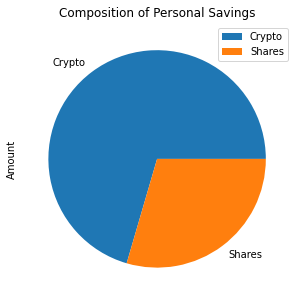

In [39]:
# Plot savings pie chart

df_savings.plot.pie(y = 'Amount', figsize = (5,5), title = "Composition of Personal Savings")


In [1]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3



# Calculate total amount of savings

total_savings = total_crypto + total_shares
total_savings

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations Mahtab! You have enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal, Mahtab")
elif emergency_fund > total_savings:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your goal")

NameError: name 'monthly_income' is not defined

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-03-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-16', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG

df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    
).df

# Display sample data

df_shares.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2020-10-21 00:00:00-04:00  117.59  117.64  117.4800  117.515  2910530  343.33   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3000  117.310  3938694  342.96   
2020-10-23 00:00:00-04:00  117.30  117.52  117.3000  117.470  3482671  345.93   
2020-10-26 00:00:00-04:00  117.65  117.72  117.5900  117.640  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.91  117.7275  117.870  5016038  339.76   

                                                              
                             high     low    close    volume  
time                                                          
2020-10-21 00:00:00-04:00  345.67  342.40  342.690  46745662  
2020-10-22 00:00:00-04:00  345.24  340.65  344.630  45094573  
2020-10-23 00:00:00-04:00  345.99  343.13  345.760  38718140  
2020-10-26 00:00:00-04:00  342.98  335.62  339.415  79491839  
2020-10-27 00:00:00-04:00  340.12  337.99  338.250  50634843

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [44]:
# Printing the simulation input data

MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2020-10-21 00:00:00-04:00  117.59  117.64  117.4800  117.515  2910530   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3000  117.310  3938694   
2020-10-23 00:00:00-04:00  117.30  117.52  117.3000  117.470  3482671   
2020-10-26 00:00:00-04:00  117.65  117.72  117.5900  117.640  4537207   
2020-10-27 00:00:00-04:00  117.80  117.91  117.7275  117.870  5016038   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2020-10-21 00:00:00-04:00          NaN  343.33  345.67  342.40  342.690   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.630   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.760   
2020-10-26 00:00:00-04:00     0.001447  342.13  342.98  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.12  337.99  338.250   

                                                  
                             volume daily_return  
time                                              
2020-10-21 00:00:00-04:00  46745662          NaN  
2020-10-22 00:00:00-04:00  45094573     0.005661  
2020-10-23 00:00:00-04:00  38718140     0.003279  
2020-10-26 00:00:00-04:00  79491839    -0.018351  
2020-10-27 00:00:00-04:00  50634843    -0.003432

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007562,0.998384,1.004765,1.005178,1.009635,1.000543,0.999613,1.005433,1.001523,0.992186,...,1.002188,0.996153,0.990853,0.994517,1.001712,0.992479,0.994942,0.989217,0.999524,1.006050
2,1.012045,1.003090,1.011671,1.005432,1.015014,0.999416,1.005222,1.016437,1.005595,0.996333,...,1.006964,0.994076,0.986967,0.998351,0.998114,0.995664,0.998543,0.985437,0.991387,1.013462
3,1.015077,1.004228,1.004368,1.005035,1.013424,0.996445,1.004946,1.014197,1.000728,1.001391,...,1.002119,0.988593,0.997004,1.004510,0.995680,1.004712,0.999951,0.986017,0.975792,1.026718
4,1.029575,1.008914,1.008839,1.011637,1.021680,1.001380,1.000371,1.011192,1.002293,1.005230,...,1.010126,0.982499,0.982805,1.001149,0.997735,0.998920,1.003277,1.001372,0.983132,1.029309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,207.302734,173.097754,499.643645,289.656753,682.352508,134.360271,291.483771,292.777878,305.502812,471.166164,...,255.228212,334.432430,492.014294,830.487909,216.179485,158.529474,380.941037,1002.176457,339.745361,474.217788
7557,206.550163,173.374321,500.262106,294.697982,695.443886,133.653885,292.924448,293.768766,303.866091,475.508444,...,254.715068,332.719594,490.397764,828.394874,216.386915,159.460772,382.208665,998.034382,341.705974,469.702883
7558,207.257051,174.811309,506.159703,294.609596,697.167438,134.480152,292.837031,295.069563,303.771816,470.654998,...,255.371766,335.606439,490.032807,826.861524,215.660741,158.609873,383.058216,993.315536,340.408693,469.646940
7559,205.400284,175.608608,511.121457,294.869144,698.110862,135.312508,292.840168,295.356067,299.804167,470.429939,...,258.234150,335.026747,486.784400,819.945244,216.426218,159.206418,383.471392,995.723686,338.100688,469.789253


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

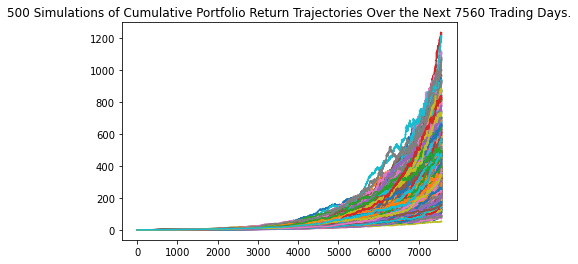

In [48]:
# Plot simulation outcomes

MC_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

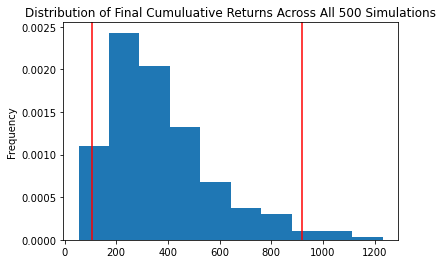

In [49]:
# Plot probability distribution and confidence intervals

MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats)

count            500.000000
mean             372.663060
std              208.662950
min               54.096518
25%              222.159187
50%              320.613164
75%              472.214047
max             1231.373693
95% CI Lower     107.538583
95% CI Upper     920.027127
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [51]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2150771.66 and $18400542.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [52]:
# Set initial investment

initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $3226157.49 and $27600813.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [54]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014517,1.004690,1.009841,1.005730,1.007940,0.998491,1.016794,0.992977,0.998378,0.988121,...,1.004057,1.007177,0.998223,1.001543,1.005484,1.002249,1.010638,0.997730,0.994349,1.000139
2,1.018490,1.008582,1.024407,1.005440,1.010506,0.992432,1.025101,0.991613,0.990951,0.994433,...,1.003405,1.012755,0.983630,0.999996,1.010893,0.994258,0.993337,0.988391,0.996465,1.009036
3,1.022532,1.023030,1.011150,1.017535,1.007784,1.000164,1.018348,0.995712,0.988166,0.997563,...,1.002043,1.011623,0.995456,0.990076,1.013575,1.004190,1.005192,0.994225,0.985114,1.018781
4,1.026180,1.012555,1.013123,1.006750,1.007160,1.001222,1.022016,1.003773,0.992586,0.986540,...,0.989531,1.020886,0.988323,0.991991,1.030044,1.013335,1.010458,0.984165,0.994360,1.001307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.753612,2.565884,4.508315,5.865773,4.685283,3.834145,2.708731,2.772808,5.899852,3.508015,...,2.026405,3.293173,3.596046,2.584196,4.496771,4.366404,4.426718,2.770870,3.172602,2.784116
1257,4.811704,2.591064,4.489199,5.825584,4.648350,3.830194,2.699010,2.761898,5.823217,3.547708,...,2.018467,3.285370,3.581436,2.604359,4.538617,4.366091,4.412842,2.779920,3.186237,2.764257
1258,4.758805,2.606988,4.510674,5.813926,4.634588,3.792994,2.699917,2.745570,5.836673,3.562783,...,2.015726,3.269683,3.570917,2.620469,4.560351,4.360382,4.460011,2.762606,3.180113,2.776059
1259,4.772733,2.594601,4.522445,5.775273,4.627494,3.764805,2.724110,2.747697,5.876288,3.521797,...,1.988374,3.320299,3.549260,2.618241,4.551373,4.373440,4.493596,2.781845,3.133166,2.798577


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

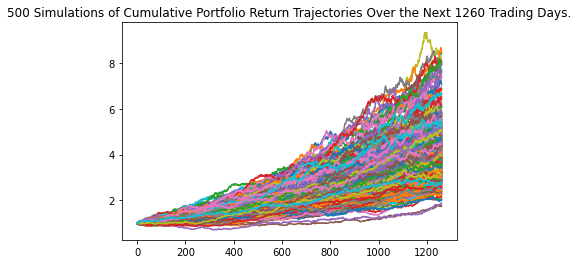

In [55]:
# Plot simulation outcomes

MC_fiveyear.plot_simulation()


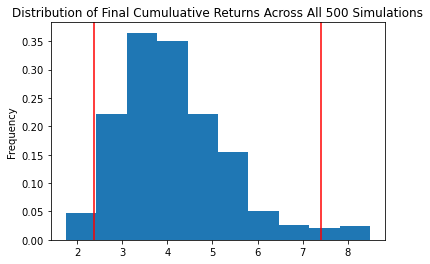

In [56]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyear.plot_distribution()


In [57]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              4.149338
std               1.197163
min               1.752197
25%               3.306365
50%               3.918502
75%               4.778582
max               8.493869
95% CI Lower      2.387064
95% CI Upper      7.411342
Name: 1260, dtype: float64


In [58]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $143223.82 and $444680.5


### Ten Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_shares,
    weights = [.15,.85],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [60]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000514,1.000118,1.001204,0.995862,0.994198,1.000214,0.990812,1.014743,0.975450,0.987380,...,1.019081,1.006181,0.995802,1.011171,0.988013,1.013529,1.006072,1.006568,1.011621,1.000563
2,1.002498,1.005844,0.998182,0.993255,1.003109,1.002595,0.997579,1.024839,0.966434,0.993638,...,1.028656,0.983381,1.000500,1.005604,0.997684,1.011077,1.011171,1.021446,1.029783,0.991052
3,1.006165,1.009593,1.008530,1.002227,0.999551,1.010115,0.983802,1.031919,0.964851,0.987615,...,1.039998,0.995768,1.001417,1.002952,1.004496,1.015395,1.010031,1.020520,1.028743,0.989521
4,1.014174,1.010477,1.010709,1.002246,1.001706,1.007322,0.982161,1.039642,0.968760,0.973863,...,1.042132,0.997922,1.002435,1.012835,1.009216,1.026988,0.996657,1.023217,1.035735,1.009617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,12.180323,28.625690,34.650820,10.052413,8.931772,21.626079,18.228312,23.492198,22.406819,12.220497,...,25.674022,31.622943,23.988371,15.609129,31.243670,17.535898,29.989717,14.063493,22.508803,26.737552
2517,12.252845,28.674960,34.744820,9.975091,8.935508,21.796745,18.093759,23.782503,22.511590,12.354933,...,25.958104,31.881190,24.162188,15.614974,31.624473,17.561210,29.806785,14.102882,22.483929,27.055220
2518,12.151223,28.237527,34.849506,10.047301,9.062455,22.025874,18.348759,23.738826,22.300336,12.330819,...,26.061083,32.132609,24.256591,15.448038,32.088964,17.420209,29.841451,14.015880,22.994672,27.122035
2519,12.339415,28.349501,35.576871,10.194835,9.076091,22.075653,18.228548,24.035543,21.945019,12.499998,...,26.083134,32.362824,24.286371,15.465280,32.407854,17.432991,29.903834,13.826646,23.137343,27.544920


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

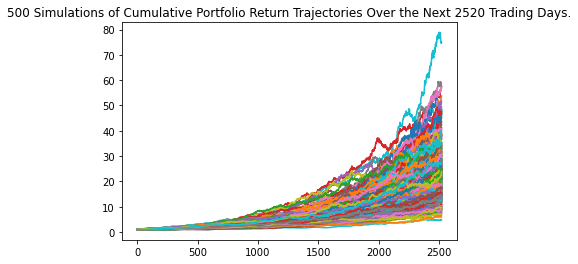

In [61]:
# Plot simulation outcomes

MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

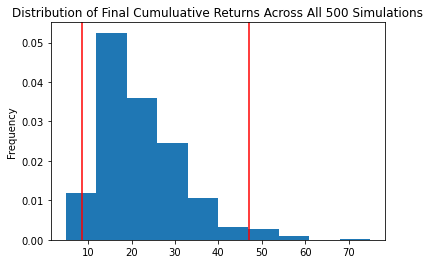

In [62]:
# Plot probability distribution and confidence intervals

MC_tenyear.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics

print(summary_stats_tbl)

count           500.000000
mean             22.290317
std               9.628574
min               4.850903
25%              15.296650
50%              20.613277
75%              27.226398
max              74.960992
95% CI Lower      8.687779
95% CI Upper     47.101454
Name: 2520, dtype: float64


In [64]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(summary_stats_tbl[8]*initial_investment,2)
ci_upper_ten = round(summary_stats_tbl[9]*initial_investment,2)


# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $521266.76 and $2826087.25
